homework 7
对于Sersic指数分别是n=1，3，4的三个星系来说，其R90/R50分别是多少？

In [1]:
import numpy as np
from scipy import integrate
import sympy as sp

#假设星系Rd = 2 kpc
# n = 1
rd = 2
f1 = lambda r: 2*np.pi*r*np.exp(-r/rd) 
F1 = integrate.quad(f1,0,float('inf'))[0]

F50 = F1*0.5
# print(F50)
F90 = F1*0.9
# print(F90)

R = np.linspace(0,20,2000)
for i in range(len(R)):
    FR = integrate.quad(f1,0,R[i])[0]
    a = FR - F50
    # print(abs(a))  #相减后取差值绝对值最小处 index=336
    b = FR -F90
    # print(abs(b)) #差值最小处 index=778
ratio = R[778]/R[336]

print(ratio)

2.3154761904761902


In [2]:
# n = 3 积分到无穷不收敛，因此选择在0-20kpc内积分
f3 = lambda r: 2*np.pi*r*np.exp(-(r/rd)**(1/3))
F3 = integrate.quad(f3,0,20)[0]
# print(F3)

F50 = F3*0.5
# print(F50)
F90 = F3*0.9
# print(F90)

R = np.linspace(0,20,2000)
for i in range(len(R)):
    FR = integrate.quad(f3,0,R[i])[0]
    a = FR - F50
    # print(abs(a))  #相减后取差值绝对值最小处 index=1241
    b = FR -F90
    # print(abs(b)) #差值最小处 index=1856
ratio = R[1856]/R[1241]
print(ratio)

1.4955680902497988


In [3]:
# n = 4 同上
f4 = lambda r: 2*np.pi*r*np.exp(-(r/rd)**(1/4))
F4 = integrate.quad(f4,0,20)[0]
# print(F4)

F50 = F4*0.5
# print(F50)
F90 = F4*0.9
# print(F90)

R = np.linspace(0,20,2000)
for i in range(len(R)):
    FR = integrate.quad(f4,0,R[i])[0]
    a = FR - F50
    # print(abs(a))  #相减后取差值绝对值最小处 index=1308
    b = FR -F90
    # print(abs(b)) #差值最小处 index=1873
ratio = R[1873]/R[1308]
print(ratio)

1.4319571865443426


##n 越大，R90/R50越大

homework 8
对于作业5中的星系，依据fits图像画出其一维的表面亮度轮廓，并计算其星等
#注意流量单位

#一维轮廓：
椭圆测光：椭圆是等面亮度轮廓，半径沿着长轴方向
圆测光:  圆孔径内的平均表面亮度

#星等：
积分（求和）到某个等亮度半径处
根据面亮度轮廓模型，积分到无穷远处

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


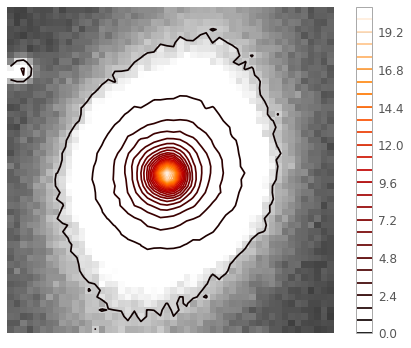

In [4]:
# NGC 4921 SDSS rband mr=12.712

import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np 

#sdss
sdss_file = get_pkg_data_filename('frame-r-005115-5-0153.fits')
# fits.info(sdss_file)
image_data = fits.getdata(sdss_file)

sdss = fits.open('frame-r-005115-5-0153.fits')
w = WCS(sdss[0].header)

plt.figure()
plt.axis("off")
plt.imshow(image_data[130:180, 1300:1350], vmin=0, vmax=1, cmap='gray')
i = np.where((image_data[130:180, 1300:1350]==image_data[130:180, 1300:1350].max( )))
plt.scatter(i[1], i[0], color='r', s=0.5)
plt.contour(image_data[130:180, 1300:1350],26)
plt.colorbar()
plt.grid(None)

11.959425010840047


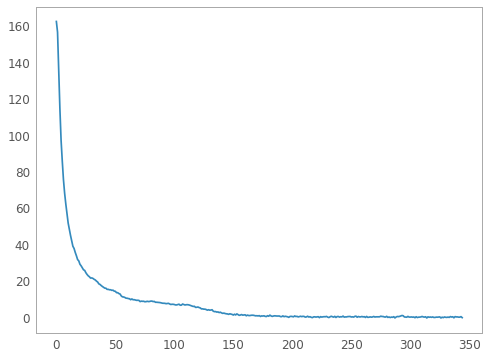

In [5]:
cut = image_data[155:500, 1300:1350]
j = np.where((cut == cut.max( )))
f = cut.sum(axis=1)
plt.plot(f)
plt.grid(False)

f_t = sum(f)
# print(f_t)
f_Re = 0.5*f_t
# print(f_Re)

print(12.712-2.5*np.log10(f_t/f_Re)) # 计算得mr = 11.96

# 检查星等的绝对值